This notebook is used for generating circuit diagrams for Figure 4 in the paper "Integer Factorization through Func-QAOA"

## Imports and Setup

In [1]:
# Import necessary modules
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import state_fidelity
from IPython.display import display
import sys
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Add path to the source code
sys.path.append(f"./../")
from src import SpaceEfficientVQF
from src.clause_utils import get_key_by_value, statevector

## Clause Generation and Display

In [2]:
# Define parameters
p = 11
q = 7
m = p * q

# Create an instance of SpaceEfficientVQF
vqf = SpaceEfficientVQF(m)

# Display original simplified clauses
for c in vqf.simplified_clauses:
    if c != 0:
        display(c)

p_2 + 2*q_1 + q_2 - 2*z_2_3 - 1

p_2*q_1 + p_3 + q_1*q_2 + q_3 + z_2_3 - 2*z_3_4 - 4*z_3_5 - 1

p_2*q_2 + p_3*q_1 + p_4 + q_1*q_3 + z_3_4 - 2*z_4_5 - 4*z_4_6

p_2*q_3 + p_3*q_2 + p_4*q_1 + p_5 + z_3_5 + z_4_5 - 2*z_5_6

p_3*q_3 + p_4*q_2 + p_5*q_1 + p_6 + z_4_6 + z_5_6 - 1

p_4*q_3 + p_5*q_2 + p_6*q_1

p_5*q_3 + p_6*q_2

p_6*q_3

## Selected Clauses and Superposition Tables

In [3]:
# Display selected clauses and their variable counts
for c in vqf.selected_clauses:
    display(c.clause)
    print(f"The number of pq variables: {len(c.pq_part.free_symbols)}")

p_2 + 2*q_1 + q_2 - 2*z_2_3 - 1

The number of pq variables: 3


p_2*q_1 + p_3 + q_1*q_2 + q_3 + z_2_3 - 2*z_3_4 - 4*z_3_5 - 1

The number of pq variables: 5


p_2*q_2 + p_3*q_1 + p_4 + q_1*q_3 + z_3_4 - 2*z_4_5 - 4*z_4_6

The number of pq variables: 6


p_2*q_3 + p_3*q_2 + p_4*q_1 + p_5 + z_3_5 + z_4_5 - 2*z_5_6

The number of pq variables: 7


p_3*q_3 + p_4*q_2 + p_5*q_1 + p_6 + z_4_6 + z_5_6 - 1

The number of pq variables: 7


p_4*q_3 + p_5*q_2 + p_6*q_1

The number of pq variables: 6


p_5*q_3 + p_6*q_2

The number of pq variables: 4


p_6*q_3

The number of pq variables: 2


In [4]:
# Display generated superposition tables
superposition_tables = vqf.superposition_tables
for t in superposition_tables:
    c = get_key_by_value(vqf.table_clause_dict, t)
    display(c.clause)
    display(t.table)
    print(f"Compression Ratio: {t.calc_r()}")
    print("---------------------------------------")

p_2 + 2*q_1 + q_2 - 2*z_2_3 - 1

,q_1,q_2,p_2
0,0,0,1
1,0,1,0
2,1,0,1
3,1,1,0


Compression Ratio: -1.0
---------------------------------------


p_6*q_3

,p_6,q_3
0,0,0
1,0,1
2,1,0


Compression Ratio: -0.4150374992788439
---------------------------------------


## Quantum State Preparation and Transpilation

In [5]:
# Prepare quantum state from a superposition table
table = superposition_tables[0]
desired_state = table.get_init_state()
array_to_latex(desired_state)

<IPython.core.display.Latex object>

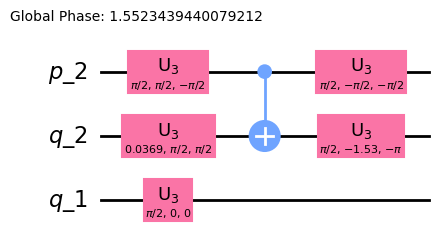

In [6]:
# Create quantum registers and circuit
bits = list(table.table.columns)[::-1]
q_regs = [QuantumRegister(1, bits[i]) for i in range(len(bits))]
qc = QuantumCircuit(*q_regs)
qc.initialize(desired_state, range(len(q_regs)))

# Display transpiled quantum circuit in LaTeX
basis = ["cx", "u3"]
transpiled_qc = transpile(qc, basis_gates=basis, optimization_level=3)
transpiled_qc.draw("mpl")

## Gate Count and Fidelity Calculation

In [7]:
# Count the gates in the transpiled circuit
gate_counts = transpiled_qc.count_ops()
print("Gate Counts:", gate_counts)

# Calculate and display fidelity between desired and output states
output_state = statevector(transpiled_qc)
fid = state_fidelity(desired_state, output_state)
print(f"Fidelity: {round(fid,5)}")

Gate Counts: OrderedDict([('u3', 5), ('cx', 1)])
Fidelity: 1.0


## Again for the other Table

In [8]:
# Display another superposition table and prepare its desired state
table = superposition_tables[1]
desired_state = table.get_init_state()
array_to_latex(desired_state)

<IPython.core.display.Latex object>

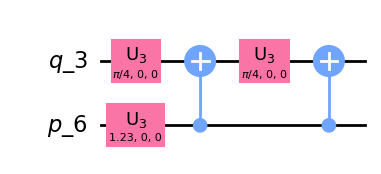

In [9]:
# Create quantum circuit and transpile
bits = list(table.table.columns)[::-1]
q_regs = [QuantumRegister(1, bits[i]) for i in range(len(bits))]
qc = QuantumCircuit(*q_regs)
qc.initialize(desired_state, range(len(q_regs)))
transpiled_qc = transpile(qc, basis_gates=basis, optimization_level=3)
transpiled_qc.draw("mpl")

In [10]:
# Count gates and calculate fidelity for the second table
gate_counts = transpiled_qc.count_ops()
print("Gate Counts:", gate_counts)
output_state = statevector(transpiled_qc)
fid = state_fidelity(desired_state, output_state)
print(f"Fidelity: {round(fid,5)}")

Gate Counts: OrderedDict([('u3', 3), ('cx', 2)])
Fidelity: 1.0
